Importing needed functions and libraries

In [1]:
from main.training_functions import *

Using Theano backend.
/home/mmezyk/anaconda3/envs/keras/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading training & validation datasets

In [2]:
d1=read_hdf5('./data/learning_data.hdf5',fb=0)
d2=read_hdf5('./data/validation_data.hdf5',fb=0)

Data loaded
Data loaded


Increasing training data volume by generating perturb traces with different gaussian noise

In [4]:
data_perturb,data_fbs=gaussian_perturbartion(d1,120)

Trace perturbation No.  0 completed
Trace perturbation No.  100 completed
Trace perturbation No.  200 completed
Trace perturbation No.  300 completed
Trace perturbation No.  400 completed
Trace perturbation No.  500 completed
Trace perturbation No.  600 completed
Trace perturbation No.  700 completed
Trace perturbation No.  800 completed
Trace perturbation No.  900 completed
Trace perturbation No.  1000 completed
Trace perturbation No.  1100 completed


Creating prefb and postfb feature matrices for validation set

In [3]:
feature_matrix_prefb_true=prefgen_vector(d1['data'][:,:],d1['gapsize'][:],dt=2,nspad=200,hwin=150,vlen=10)
feature_matrix_prefb_false=prefgen_false_vector(d1['data'][:,:],d1['gapsize'][:],dt=2,nspad=200,hwin=150,fb_hzone=500,vlen=10)
feature_matrix_postfb_true=postfgen_vector(d1['data'][:,:],d1['gapsize'][:],dt=2,hwin=150,vlen=10)
feature_matrix_postfb_false=postfgen_false_vector(d1['data'][:,:],d1['gapsize'][:],dt=2,hwin=150,fb_hzone=500,vlen=10)
testset_prefb=np.vstack((feature_matrix_prefb_true,feature_matrix_prefb_false))
testset_postfb=np.vstack((feature_matrix_postfb_true,feature_matrix_postfb_false))

Feature vector for trace No.  0 completed
Feature vector for trace No.  100 completed
Feature vector for trace No.  200 completed
Feature vector for trace No.  300 completed
Feature vector for trace No.  400 completed
Feature vector for trace No.  500 completed
Feature vector for trace No.  600 completed
Feature vector for trace No.  700 completed
Feature vector for trace No.  800 completed
Feature vector for trace No.  900 completed
Feature vector for trace No.  1000 completed
Feature vector for trace No.  1100 completed
Feature vector for trace No.  0 completed
Feature vector for trace No.  100 completed
Feature vector for trace No.  200 completed
Feature vector for trace No.  300 completed
Feature vector for trace No.  400 completed
Feature vector for trace No.  500 completed
Feature vector for trace No.  600 completed
Feature vector for trace No.  700 completed
Feature vector for trace No.  800 completed
Feature vector for trace No.  900 completed
Feature vector for trace No.  1000

Creating prefb and postfb feature matrices for train set

In [ ]:
feature_matrix_prefb_true=prefgen_vector(data_perturb,data_fbs,dt=2,nspad=200,hwin=150,vlen=10)
feature_matrix_prefb_false=prefgen_false_vector(data_perturb,data_fbs,dt=2,nspad=200,hwin=150,fb_hzone=500,vlen=10)
feature_matrix_postfb_true=postfgen_vector(data_perturb,data_fbs,dt=2,hwin=150,vlen=10)
feature_matrix_postfb_false=postfgen_false_vector(data_perturb,data_fbs,dt=2,hwin=150,fb_hzone=500,vlen=10)
trainset_prefb=np.vstack((feature_matrix_prefb_true,feature_matrix_prefb_false))
trainset_postfb=np.vstack((feature_matrix_postfb_true,feature_matrix_postfb_false))

Creating single sample model feature matrices for train & validation sets

In [5]:
trainset_1s=dataset_prep(trainset_prefb[:,:],1,11,mode=1)
testset_1s=dataset_prep(testset_prefb[:,:],1,11,mode=1)

Single sample model training

In [6]:
model_1s,model_1s_log=model_training(trainset_1s,testset_1s,hidden_layers=2,neurons=50,input_dim=9,batch_size=10,epochs=100)

/home/mmezyk/github/fbpicker/main/training_functions.py:307: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=50, input_dim=9, activation="relu")`
  model.add(Dense(output_dim = neurons, init = 'he_normal', activation = 'relu', input_dim = input_dim))
/home/mmezyk/github/fbpicker/main/training_functions.py:308: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=50, activation="relu")`
  model.add(Dense(output_dim = neurons, init = 'he_normal', activation = 'relu'))
/home/mmezyk/github/fbpicker/main/training_functions.py:318: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=1, activation="sigmoid")`
  model.add(Dense(output_dim = 1, init = 'he_normal', activation = 'sigmoid'))
/home/mmezyk/anaconda3/envs/keras/lib/python3.5/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.

Train on 358494 samples, validate on 329726 samples
Epoch 1/100
358494/358494 [==============================] - 30s 84us/step - loss: 0.1491 - acc: 0.9395 - val_loss: 0.1499 - val_acc: 0.9343
Epoch 2/100
358494/358494 [==============================] - 29s 81us/step - loss: 0.1330 - acc: 0.9459 - val_loss: 0.1436 - val_acc: 0.9374
Epoch 3/100
358494/358494 [==============================] - 29s 81us/step - loss: 0.1286 - acc: 0.9476 - val_loss: 0.1341 - val_acc: 0.9420
Epoch 4/100
358494/358494 [==============================] - 29s 82us/step - loss: 0.1261 - acc: 0.9487 - val_loss: 0.1330 - val_acc: 0.9442
Epoch 5/100
358494/358494 [==============================] - 29s 81us/step - loss: 0.1244 - acc: 0.9493 - val_loss: 0.1315 - val_acc: 0.9441
Epoch 6/100
358494/358494 [==============================] - 27s 77us/step - loss: 0.1233 - acc: 0.9498 - val_loss: 0.1297 - val_acc: 0.9437
Epoch 7/100
358494/358494 [==============================] - 28s 78us/step - loss: 0.1224 - acc: 0.950

Pre-first-break and 10-sample model training

In [7]:
model_10s_prefb,model_10s_prefb_log=model_training(trainset_10s_prefb,testset_10s_prefb,hidden_layers=2,neurons=50,input_dim=90,batch_size=10,epochs=100)

/home/mmezyk/github/fbpicker/main/training_functions.py:307: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=50, input_dim=90, activation="relu")`
  model.add(Dense(output_dim = neurons, init = 'he_normal', activation = 'relu', input_dim = input_dim))
/home/mmezyk/github/fbpicker/main/training_functions.py:308: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=50, activation="relu")`
  model.add(Dense(output_dim = neurons, init = 'he_normal', activation = 'relu'))
/home/mmezyk/github/fbpicker/main/training_functions.py:318: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=1, activation="sigmoid")`
  model.add(Dense(output_dim = 1, init = 'he_normal', activation = 'sigmoid'))
/home/mmezyk/anaconda3/envs/keras/lib/python3.5/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`

Train on 358494 samples, validate on 329726 samples
Epoch 1/100
358494/358494 [==============================] - 33s 91us/step - loss: 0.1447 - acc: 0.9411 - val_loss: 0.1451 - val_acc: 0.9369
Epoch 2/100
358494/358494 [==============================] - 34s 94us/step - loss: 0.1239 - acc: 0.9494 - val_loss: 0.1276 - val_acc: 0.9438
Epoch 3/100
358494/358494 [==============================] - 34s 95us/step - loss: 0.1172 - acc: 0.9524 - val_loss: 0.1221 - val_acc: 0.9468
Epoch 4/100
358494/358494 [==============================] - 35s 98us/step - loss: 0.1134 - acc: 0.9537 - val_loss: 0.1409 - val_acc: 0.9362
Epoch 5/100
358494/358494 [==============================] - 34s 95us/step - loss: 0.1108 - acc: 0.9545 - val_loss: 0.1190 - val_acc: 0.9476
Epoch 6/100
358494/358494 [==============================] - 34s 95us/step - loss: 0.1085 - acc: 0.9557 - val_loss: 0.1241 - val_acc: 0.9499
Epoch 7/100
358494/358494 [==============================] - 34s 96us/step - loss: 0.1069 - acc: 0.956

Post-first-break and 10-sample model training

In [8]:
model_10s_postfb,model_10s_postfb_log=model_training(trainset_10s_postfb,testset_10s_postfb,hidden_layers=2,neurons=50,input_dim=90,batch_size=10,epochs=100)

/home/mmezyk/github/fbpicker/main/training_functions.py:307: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=50, input_dim=90, activation="relu")`
  model.add(Dense(output_dim = neurons, init = 'he_normal', activation = 'relu', input_dim = input_dim))
/home/mmezyk/github/fbpicker/main/training_functions.py:308: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=50, activation="relu")`
  model.add(Dense(output_dim = neurons, init = 'he_normal', activation = 'relu'))
/home/mmezyk/github/fbpicker/main/training_functions.py:318: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_normal", units=1, activation="sigmoid")`
  model.add(Dense(output_dim = 1, init = 'he_normal', activation = 'sigmoid'))
/home/mmezyk/anaconda3/envs/keras/lib/python3.5/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`

Train on 358494 samples, validate on 329726 samples
Epoch 1/100
358494/358494 [==============================] - 29s 82us/step - loss: 0.1271 - acc: 0.9520 - val_loss: 0.1380 - val_acc: 0.9431
Epoch 2/100
358494/358494 [==============================] - 30s 85us/step - loss: 0.1073 - acc: 0.9589 - val_loss: 0.1156 - val_acc: 0.9533
Epoch 3/100
358494/358494 [==============================] - 31s 86us/step - loss: 0.1021 - acc: 0.9610 - val_loss: 0.1102 - val_acc: 0.9562
Epoch 4/100
358494/358494 [==============================] - 31s 86us/step - loss: 0.0990 - acc: 0.9620 - val_loss: 0.1095 - val_acc: 0.9569
Epoch 5/100
358494/358494 [==============================] - 31s 87us/step - loss: 0.0970 - acc: 0.9625 - val_loss: 0.1093 - val_acc: 0.9583
Epoch 6/100
358494/358494 [==============================] - 31s 87us/step - loss: 0.0953 - acc: 0.9633 - val_loss: 0.1252 - val_acc: 0.9476
Epoch 7/100
358494/358494 [==============================] - 31s 88us/step - loss: 0.0939 - acc: 0.963

Saving trained models

In [9]:
model_1s.save('/home/mmezyk/github/fbpicker/models/m_1s_gauss.h5')
model_10s_postfb.save('/home/mmezyk/github/fbpicker/models/m_10s_postfb_gauss.h5')
model_10s_prefb.save('/home/mmezyk/github/fbpicker/models/m_10s_prefb_gauss.h5')

Models' performances throughout the learning stage (epochs)

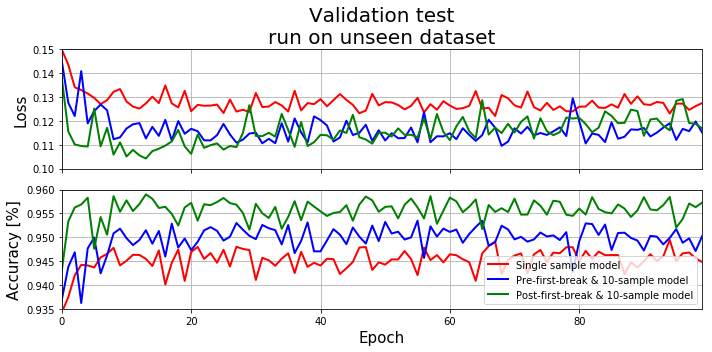

In [34]:
plot_training_log(model_1s_log,'Single sample model',model_10s_prefb_log,'Pre-first-break & 10-sample model',model_10s_postfb_log,'Post-first-break & 10-sample model',00.1,0.15,0.935,0.96)

Confusion matrices for each derived model

In [51]:
print('Single sample model')
model_test(model_1s,testset_1s,0.35)

Single sample model
Total predictions: 329726
True positive: 155595
True negative: 157714
False positive: 9268
False negative: 7149
Accuracy: 0.9502101745085313


In [50]:
print('Pre-first-break & 10-sample model')
model_test(model_10s_prefb,testset_10s_prefb,0.35)

Pre-first-break & 10-sample model
Total predictions: 329726
True positive: 156182
True negative: 158906
False positive: 8681
False negative: 5957
Accuracy: 0.9556055634071926


In [52]:
print('Post-first-break & 10-sample model')
model_test(model_10s_postfb,testset_10s_postfb,0.35)

Post-first-break & 10-sample model
Total predictions: 329726
True positive: 157467
True negative: 159335
False positive: 7396
False negative: 5528
Accuracy: 0.9608038189284436
